#Regression in Python

##Author: Sarthak Miglani

##Importing Data_Set

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/hw-04-sarthakMiglani726/main/Data/big_tech_stock_prices.csv', header='infer')
data

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...,...
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


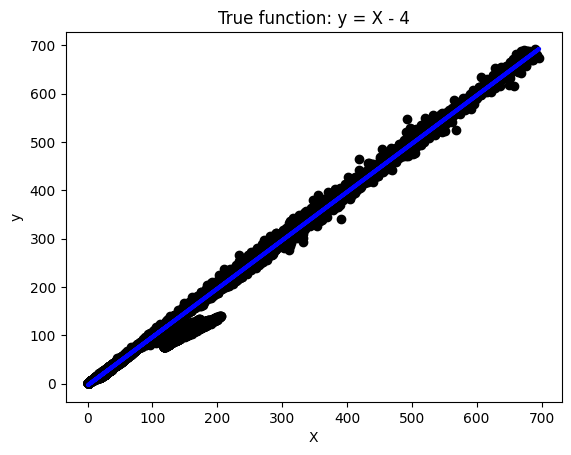

In [139]:
X = data[['open', 'volume']]
y = data['adj_close']
numInstances = data.shape[0]

y_true = 1*X['open'] - 4

plt.scatter(X['open'], y,  color='black')
plt.plot(X['open'], y_true, color='blue', linewidth=3)
plt.title('True function: y = X - 4')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##Multiple Linear Regression

###Step 1: Split Input Data into Training and Test Sets

In [93]:
numTest = 4509   # number of training instances
numTrain = numInstances - numTest

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

###Step 2: Fit Regression Model to Training Set

In [94]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression()

###Step 3: Apply Model to the Test Set

In [95]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

###Step 4: Evaluate Model Performance on Test Set

Root mean squared error = 4.6718
R-squared = 0.9966


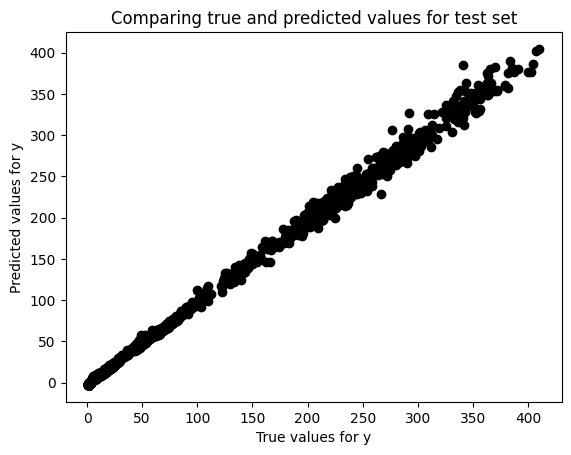

In [96]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

###Step 5: Postprocessing

In [97]:
# Display model parameters
print('Slope = ', regr.coef_[0])

Slope =  0.9910623390232274


In [98]:
print('Intercept = ', regr.intercept_)

Intercept1 =  -4.156459493452488


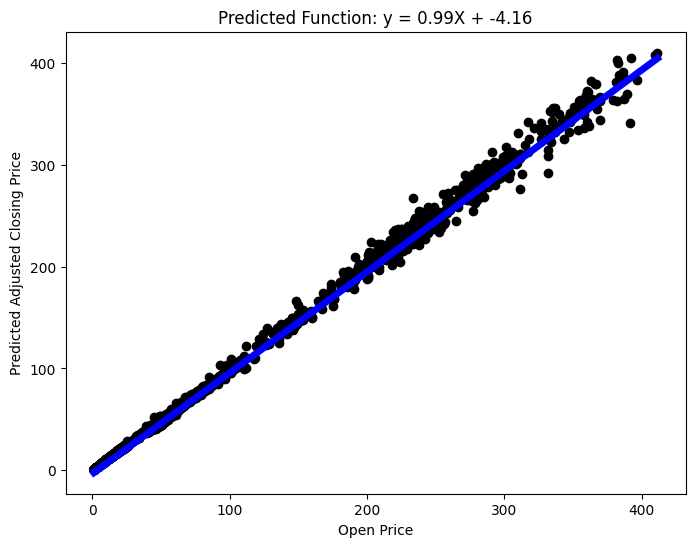

In [123]:
# Generating a range of 'open' prices
open_price_range = np.linspace(X_test['open'].min(), X_test['open'].max(), 100).reshape(-1, 1)

# Since we have another feature 'volume', we need to include it for prediction
# We will use the mean volume from the test set for this purpose
mean_volume = X_test['volume'].mean()

# Creating a new test set with the range of open prices and mean volume
new_test_set = np.hstack((open_price_range, np.full(open_price_range.shape, mean_volume)))


# Creating a DataFrame for the new test set with appropriate column names
new_test_df = pd.DataFrame(new_test_set, columns=['open', 'volume'])

# Predicting 'adj_close' prices using the DataFrame
predicted_adj_close_df = regr.predict(new_test_df)

# Re-plotting the regression line without the warning
plt.figure(figsize=(8, 6))
plt.scatter(X_test['open'], y_test, color='black')
plt.plot(open_price_range, predicted_adj_close_df, color='blue', linewidth=5)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('Open Price')
plt.ylabel('Predicted Adjusted Closing Price')
plt.show()